In [5]:
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
import scipy.optimize as opt
from sklearn import preprocessing
import matplotlib.pyplot as plt


In [149]:
data = pd.read_csv('telecom.csv')
data.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


<Axes: >

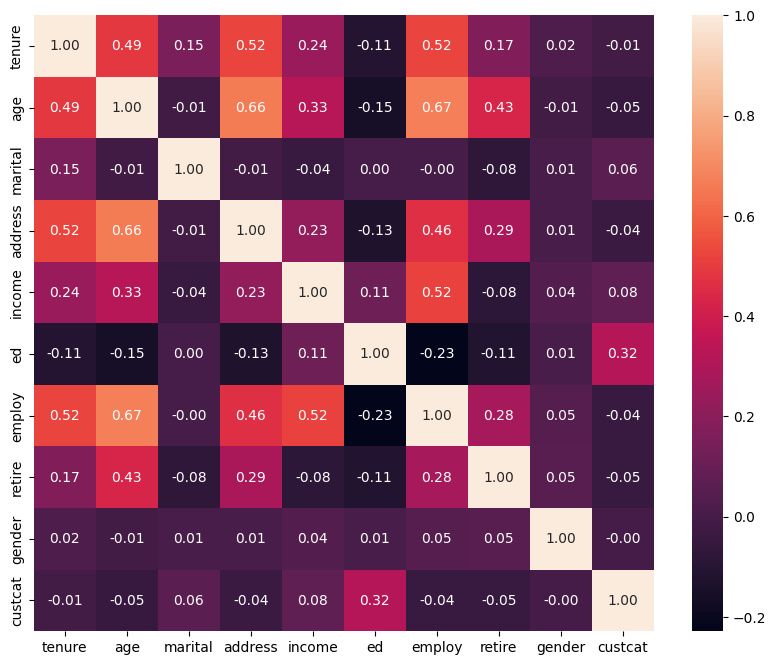

In [62]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(),annot=True, fmt=".2f")

In [151]:
data = data.drop(['region','reside'], axis=1)
data.head()

,tenure,age,marital,address,income,ed,employ,retire,gender,custcat
0,13,44,1,9,64.0,4,5,0.0,0,1
1,11,33,1,7,136.0,5,5,0.0,0,4
2,68,52,1,24,116.0,1,29,0.0,1,1
3,33,33,0,12,33.0,2,0,0.0,1,1
4,23,30,1,9,30.0,1,2,0.0,0,1


In [63]:
data.custcat.value_counts()

,count
custcat,
1,764
4,236


In [152]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [19]:
from sklearn import preprocessing

In [153]:
x = preprocessing.StandardScaler().fit(x).transform(x)

In [158]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=0)



In [22]:
from sklearn.linear_model import LogisticRegression

In [159]:
LR = LogisticRegression().fit(x_train,y_train)

In [160]:
y_pred = LR.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1,
       1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1,
       1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1,
       1, 1])

In [ ]:
y_Pred_prob = LR.predict_proba(x_test)
y_Pred_prob

check "https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html


In [29]:
from sklearn.metrics import accuracy_score

In [161]:
print("accuracy = ", accuracy_score(y_test,y_pred))

accuracy =  0.78


In [39]:
from sklearn.metrics import ConfusionMatrixDisplay

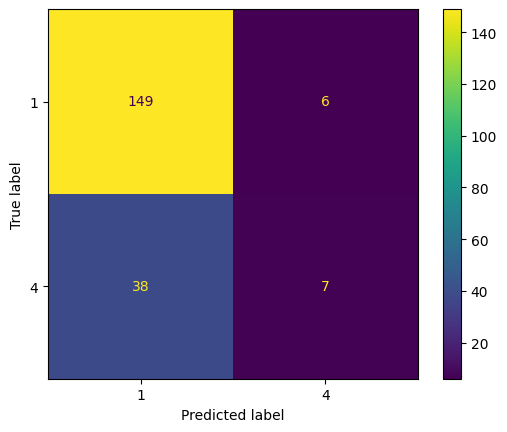

In [162]:
y = LogisticRegression().fit(x_train, y_train)
ConfusionMatrixDisplay.from_estimator(y, x_test, y_test)

In [46]:
data.head(10)

,tenure,age,marital,address,income,ed,employ,retire,gender,custcat
0,13,44,1,9,64.0,4,5,0.0,0,1
1,11,33,1,7,136.0,5,5,0.0,0,4
2,68,52,1,24,116.0,1,29,0.0,1,3
3,33,33,0,12,33.0,2,0,0.0,1,1
4,23,30,1,9,30.0,1,2,0.0,0,3
5,41,39,0,17,78.0,2,16,0.0,1,3
6,45,22,1,2,19.0,2,4,0.0,1,2
7,38,35,0,5,76.0,2,10,0.0,0,4
8,45,59,1,7,166.0,4,31,0.0,0,3
9,68,41,1,21,72.0,1,22,0.0,0,2


In [150]:
data.loc[data ['custcat'] == 2, ['custcat']] = 1
data.loc[data['custcat'] == 3, ['custcat']] = 1


In [49]:
data.head(10)

,tenure,age,marital,address,income,ed,employ,retire,gender,custcat
0,13,44,1,9,64.0,4,5,0.0,0,1
1,11,33,1,7,136.0,5,5,0.0,0,3
2,68,52,1,24,116.0,1,29,0.0,1,3
3,33,33,0,12,33.0,2,0,0.0,1,1
4,23,30,1,9,30.0,1,2,0.0,0,3
5,41,39,0,17,78.0,2,16,0.0,1,3
6,45,22,1,2,19.0,2,4,0.0,1,1
7,38,35,0,5,76.0,2,10,0.0,0,3
8,45,59,1,7,166.0,4,31,0.0,0,3
9,68,41,1,21,72.0,1,22,0.0,0,1
